## Comparación de desempeño

Grupo: 1

Estudiantes:

-Constanza Olivos Fernandez

-Javier Nanco Becerra

-Nicolás Pozo Villagrán

Fecha: 20-09-2025

Version: 1.0

## Objetivos del notebook

El objetivo de este notebook es comparar cuantitativamente el desempeño de distintos modelos de machine learning aplicados a la predicción del rendimiento de cultivos de trigo. Para ello:

Se integran los resultados de métricas previamente calculadas (MAE, RMSE, R² y MAPE) en un único marco comparativo.

Se normalizan los indicadores de error para facilitar una comparación equitativa, de modo que valores más altos representen un mejor desempeño.

Se construye un gráfico de barras agrupadas que permite visualizar de forma simultánea las fortalezas y debilidades de cada modelo, tanto en precisión (R²) como en la magnitud de los errores (RMSE, MAE y MAPE).

Se genera una tabla y un gráfico final que apoyan la identificación de los modelos más robustos y confiables, destacando especialmente el comportamiento diferencial entre enfoques clásicos, modernos y optimizados.

En conjunto, este análisis busca entregar evidencia clara y visualmente comprensible para seleccionar el modelo más adecuado en aplicaciones de predicción agrícola.

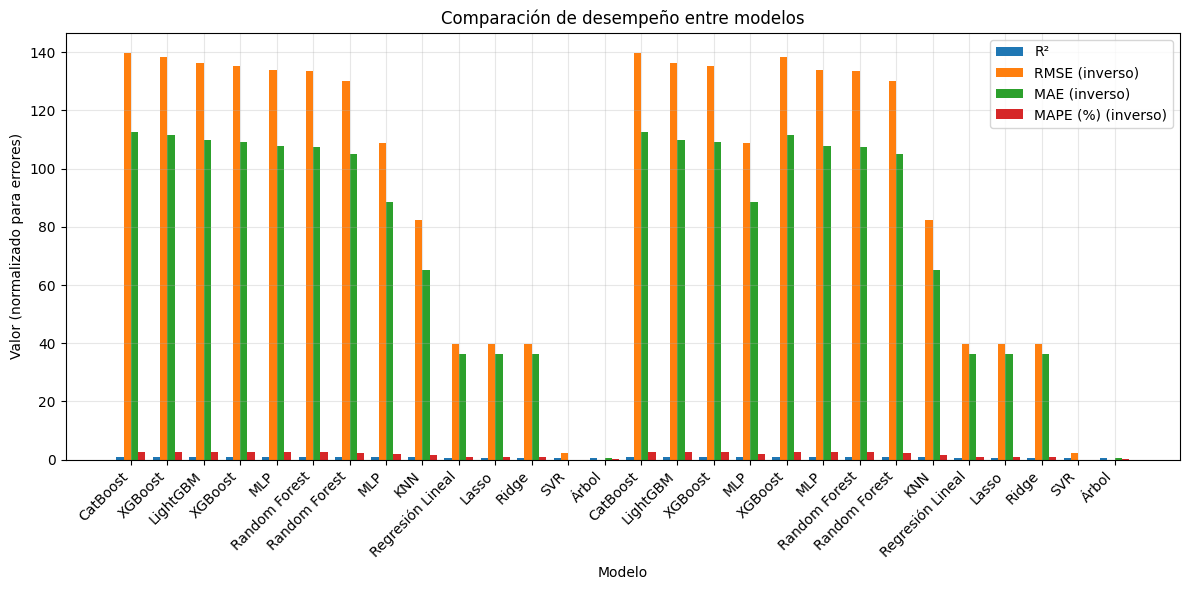

✅ Gráfico de comparación de desempeño guardado como 'comparacion_desempeno_modelos.png'


In [1]:
# ===========================
# 5.1 Comparación de desempeño
# ===========================

import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

# ===========================
# 1. Leer los CSV de resultados comparativos
# ===========================
archivos_resultados = glob.glob("comparacion_modelos_trigo*.csv")
lista_df = []
for archivo in archivos_resultados:
    df = pd.read_csv(archivo)
    lista_df.append(df)

# Combinar en un solo DataFrame
df_comparativo = pd.concat(lista_df, ignore_index=True)

# ===========================
# 2. Seleccionar columnas de interés
# ===========================
# Solo métricas numéricas principales
df_plot = df_comparativo[["Modelo", "R²", "RMSE", "MAE", "MAPE (%)"]].copy()

# ===========================
# 3. Normalizar métricas para compararlas en un mismo gráfico
# R² va de 0-1 (ya está bien)
# Errores se pueden normalizar inversamente para que más alto = mejor
# ===========================
df_plot["RMSE_norm"] = df_plot["RMSE"].max() - df_plot["RMSE"]
df_plot["MAE_norm"]  = df_plot["MAE"].max() - df_plot["MAE"]
df_plot["MAPE_norm"] = df_plot["MAPE (%)"].max() - df_plot["MAPE (%)"]

# ===========================
# 4. Preparar datos para gráfico de barras agrupadas
# ===========================
labels = df_plot["Modelo"]
metrics = ["R²", "RMSE_norm", "MAE_norm", "MAPE_norm"]
metric_names = ["R²", "RMSE (inverso)", "MAE (inverso)", "MAPE (%) (inverso)"]

x = np.arange(len(labels))  # posiciones de las barras
width = 0.2  # ancho de cada barra

fig, ax = plt.subplots(figsize=(12,6))

for i, m in enumerate(metrics):
    ax.bar(x + i*width, df_plot[m], width, label=metric_names[i])

# ===========================
# 5. Personalización
# ===========================
ax.set_xlabel("Modelo")
ax.set_ylabel("Valor (normalizado para errores)")
ax.set_title("Comparación de desempeño entre modelos")
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("comparacion_desempeno_modelos.png", dpi=300)
plt.show()
print("✅ Gráfico de comparación de desempeño guardado como 'comparacion_desempeno_modelos.png'")


## Conclusión

El gráfico de comparación de desempeño muestra con claridad la superioridad de los modelos de boosting (CatBoost, LightGBM y XGBoost) frente al resto de enfoques evaluados. Estos algoritmos alcanzan los valores más altos de R² y presentan los errores más bajos en todas las métricas (MAE, RMSE y MAPE), lo que confirma su mayor capacidad predictiva y consistencia.

En un segundo nivel se ubican Random Forest y KNN, que mantienen un rendimiento sólido, con R² relativamente altos y errores moderados, aunque no logran igualar la precisión de los modelos de boosting.

Por último, los modelos clásicos de regresión (Regresión Lineal, Ridge, Lasso, Árbol de Decisión y SVR) presentan un desempeño considerablemente menor, con menor poder explicativo y mayores errores, lo que los hace menos adecuados para este conjunto de datos.

En síntesis, los resultados respaldan la elección de los modelos de boosting como la alternativa más robusta y confiable para predecir el rendimiento de cultivos de trigo en este escenario, seguidos por Random Forest y KNN como opciones intermedias.